In [1]:
library(gridExtra)
library(matrixStats)
library(dplyr)
library(rlang)
library(reshape2)
library(clusterCrit)
library(grid)
library(ggrepel)
library(RColorBrewer)
library(dplyr)
library(IRdisplay)
library(scales)
library(survival)
library(corrplot)
library(Hmisc)
library(ggplot2)
library(survminer)
library(muhaz)
library(dplyr)
library(stringr)
library(dummies)
library(miceadds)
options(warn=-1)
library(data.table)
library(tidyr)

source('../../../../src/tools.R')     # custom tools function
source('../../../../src/hdp_tools_yanis.R')
source("../../../../src/merge_df.R")
source("../../../../src/my_toolbox.R")
source("../../../../src/my_components.R")
source("../../../../src/my_utils.R")
source("../../../../src/ggstyles.R")
source("../../../../src/my_hotspots.R")
###
source("../../../script_figures/tools.R")

theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed






Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2

Attaching package: ‘survival’

The following object is masked from ‘package:clusterCrit’:

    concordance

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:rlang’:

    set_names

dummies-1.5.6 provided by Decision Patterns

Loading required package: mice

In [2]:
nejm_data <- read.table("full_data_validation_NO_ITD.tsv")
load.Rdata("AMLSG_Clinical_Anon.RData","val_data")
rownames(val_data) <- val_data$PDID


In [3]:
nejm_data_tpl <- merge(nejm_data,val_data[,c("TPL_type","TPL_o")],by=0)
comp <- colnames(nejm_data_tpl[,c(91:107)])
gen <- colnames(nejm_data_tpl[,c(2:58)])
cyto <- colnames(nejm_data_tpl[,c(59:81)])

In [4]:
table(nejm_data_tpl$TPL_type)


                      ALLO                       AUTO 
                       234                         77 
                     FREMD                      HAPLO 
                       319                         12 
TPL_(Spenderart_unbekannt) 
                         5 

In [6]:
getwd()

[1] "/Users/taziy/AML_analysis/analysis/prognosis/Prognosis_locked/Validation"

In [70]:
df_tmp <- nejm_data_tpl[,c(comp,"TPL_o")]

df_tmp_no_tpl <- df_tmp[df_tmp$TPL_o==0,]
no_tpl <- data.frame(freq = 100*colSums(df_tmp_no_tpl[,comp])/nrow(nejm_data_tpl),Transplant="No")
no_tpl$names <- rownames(no_tpl)

df_tmp_tpl <- df_tmp[df_tmp$TPL_o==1,]
tpl <- data.frame(freq = 100*colSums(df_tmp_tpl[,comp])/nrow(nejm_data_tpl),Transplant="Yes")
tpl$names <- rownames(tpl)

r <- rbind(no_tpl,tpl)
r
r$names <- str_replace(r$names,"full_component_","")
p <- ggplot(r,aes(reorder(names,freq),freq,fill=Transplant))+
        geom_bar(stat="identity",aes(fill=Transplant))+
        coord_flip()+
        xlab("Components") + ylab("Frequency over the cohort (%)")+scale_fill_manual(values=c("#e79f00", "#009E73"))+
scale_y_continuous(breaks = function(x) unique(floor(pretty(seq(0, (max(x) + 1) * 1.1)))))+
labs(fill='Transplant') +ggtitle(" Repartition of the components representation in dataset across transplant status")+
theme(axis.text.x=element_text(size=22,face="bold"),axis.title.x = element_text(size=25),axis.text.y=element_text(size=22,face="bold"),axis.title.y = element_text(size=25),legend.text = element_text(size=25),legend.title = element_text(size=30),
      plot.title = element_text(size=25,face="bold",hjust=0.5))+
                   ylab("Frequency (%)")+xlab("Components")

,freq,Transplant,names
full_component_t_15_17,3.0612245,No,full_component_t_15_17
full_component_inv_16,2.2108844,No,full_component_inv_16
full_component_t_8_21,2.2108844,No,full_component_t_8_21
full_component_t_11,0.4251701,No,full_component_t_11
full_component_t_6_9,0.3401361,No,full_component_t_6_9
full_component_inv_3,0.6802721,No,full_component_inv_3
full_component_additions,3.8265306,No,full_component_additions
full_component_TP53_complex,5.3571429,No,full_component_TP53_complex
full_component_NPM1,15.2210884,No,full_component_NPM1
full_component_CEBPA_bi,2.2108844,No,full_component_CEBPA_bi


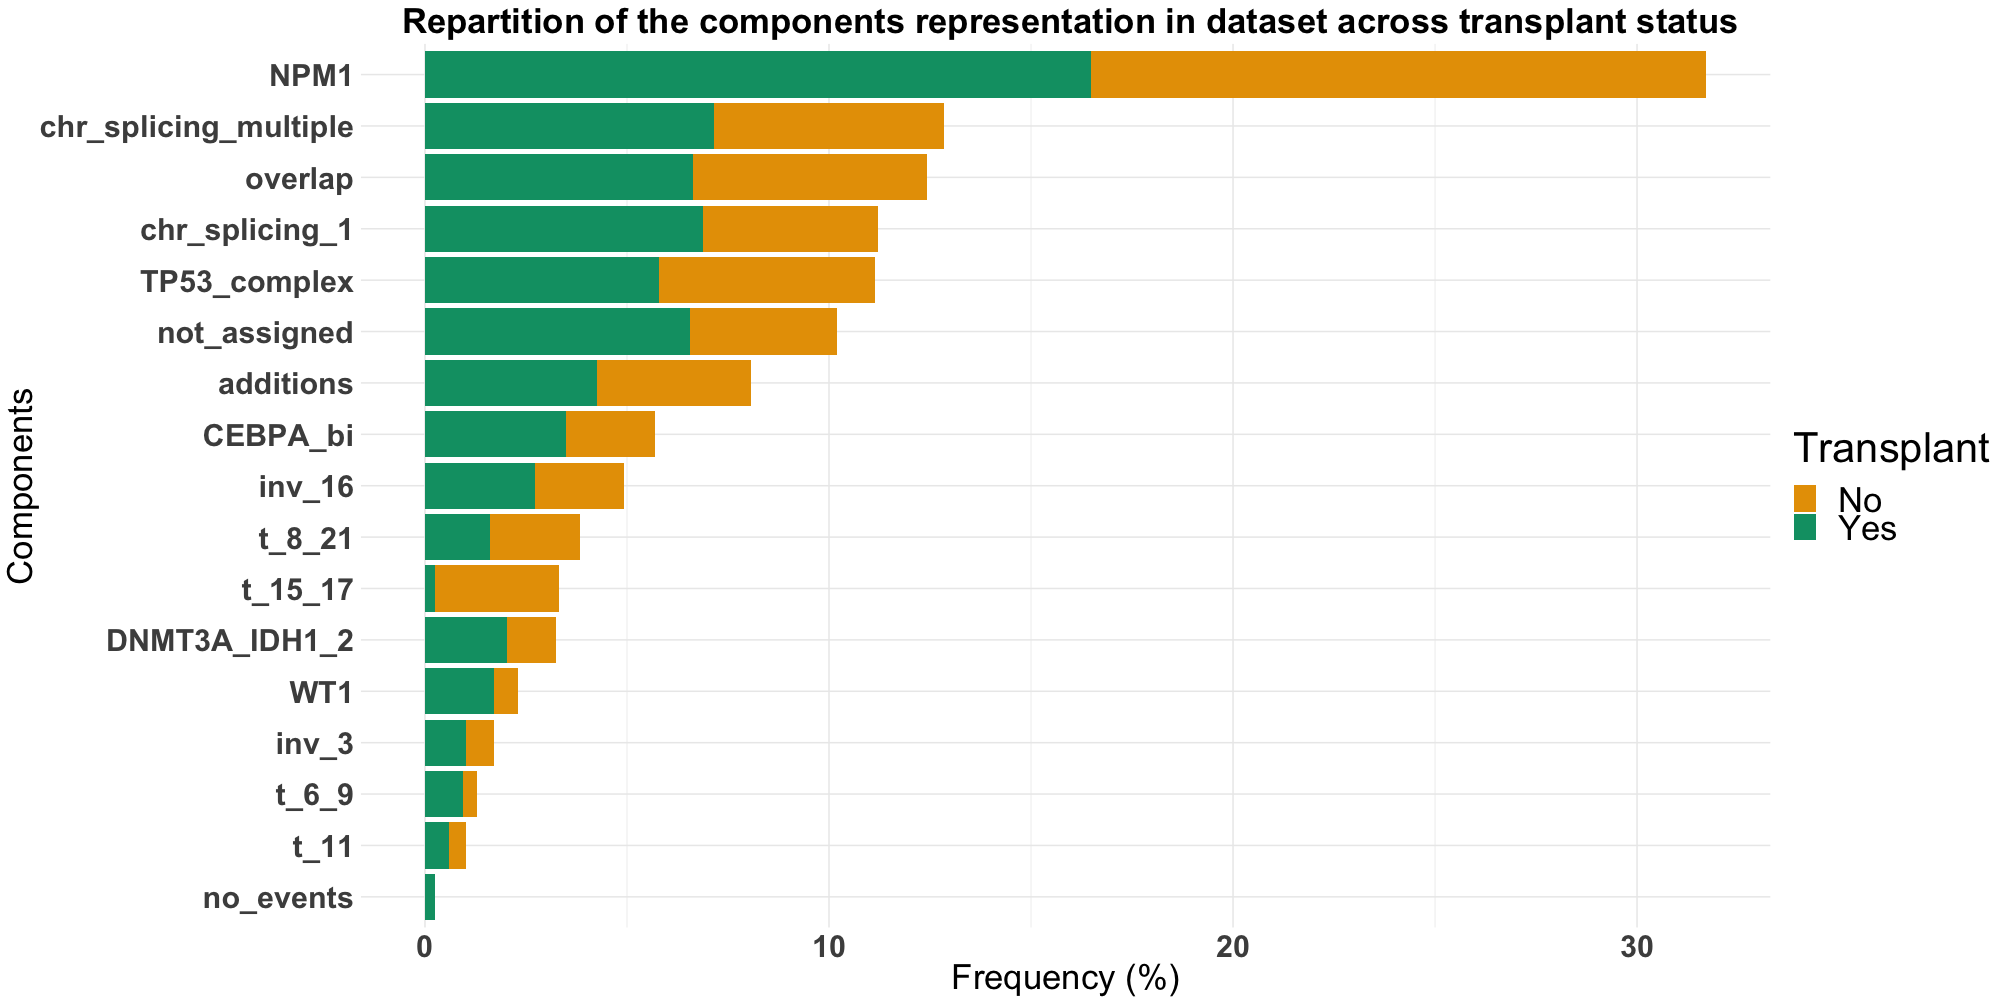

In [71]:
set_notebook_plot_size(20,10)
p

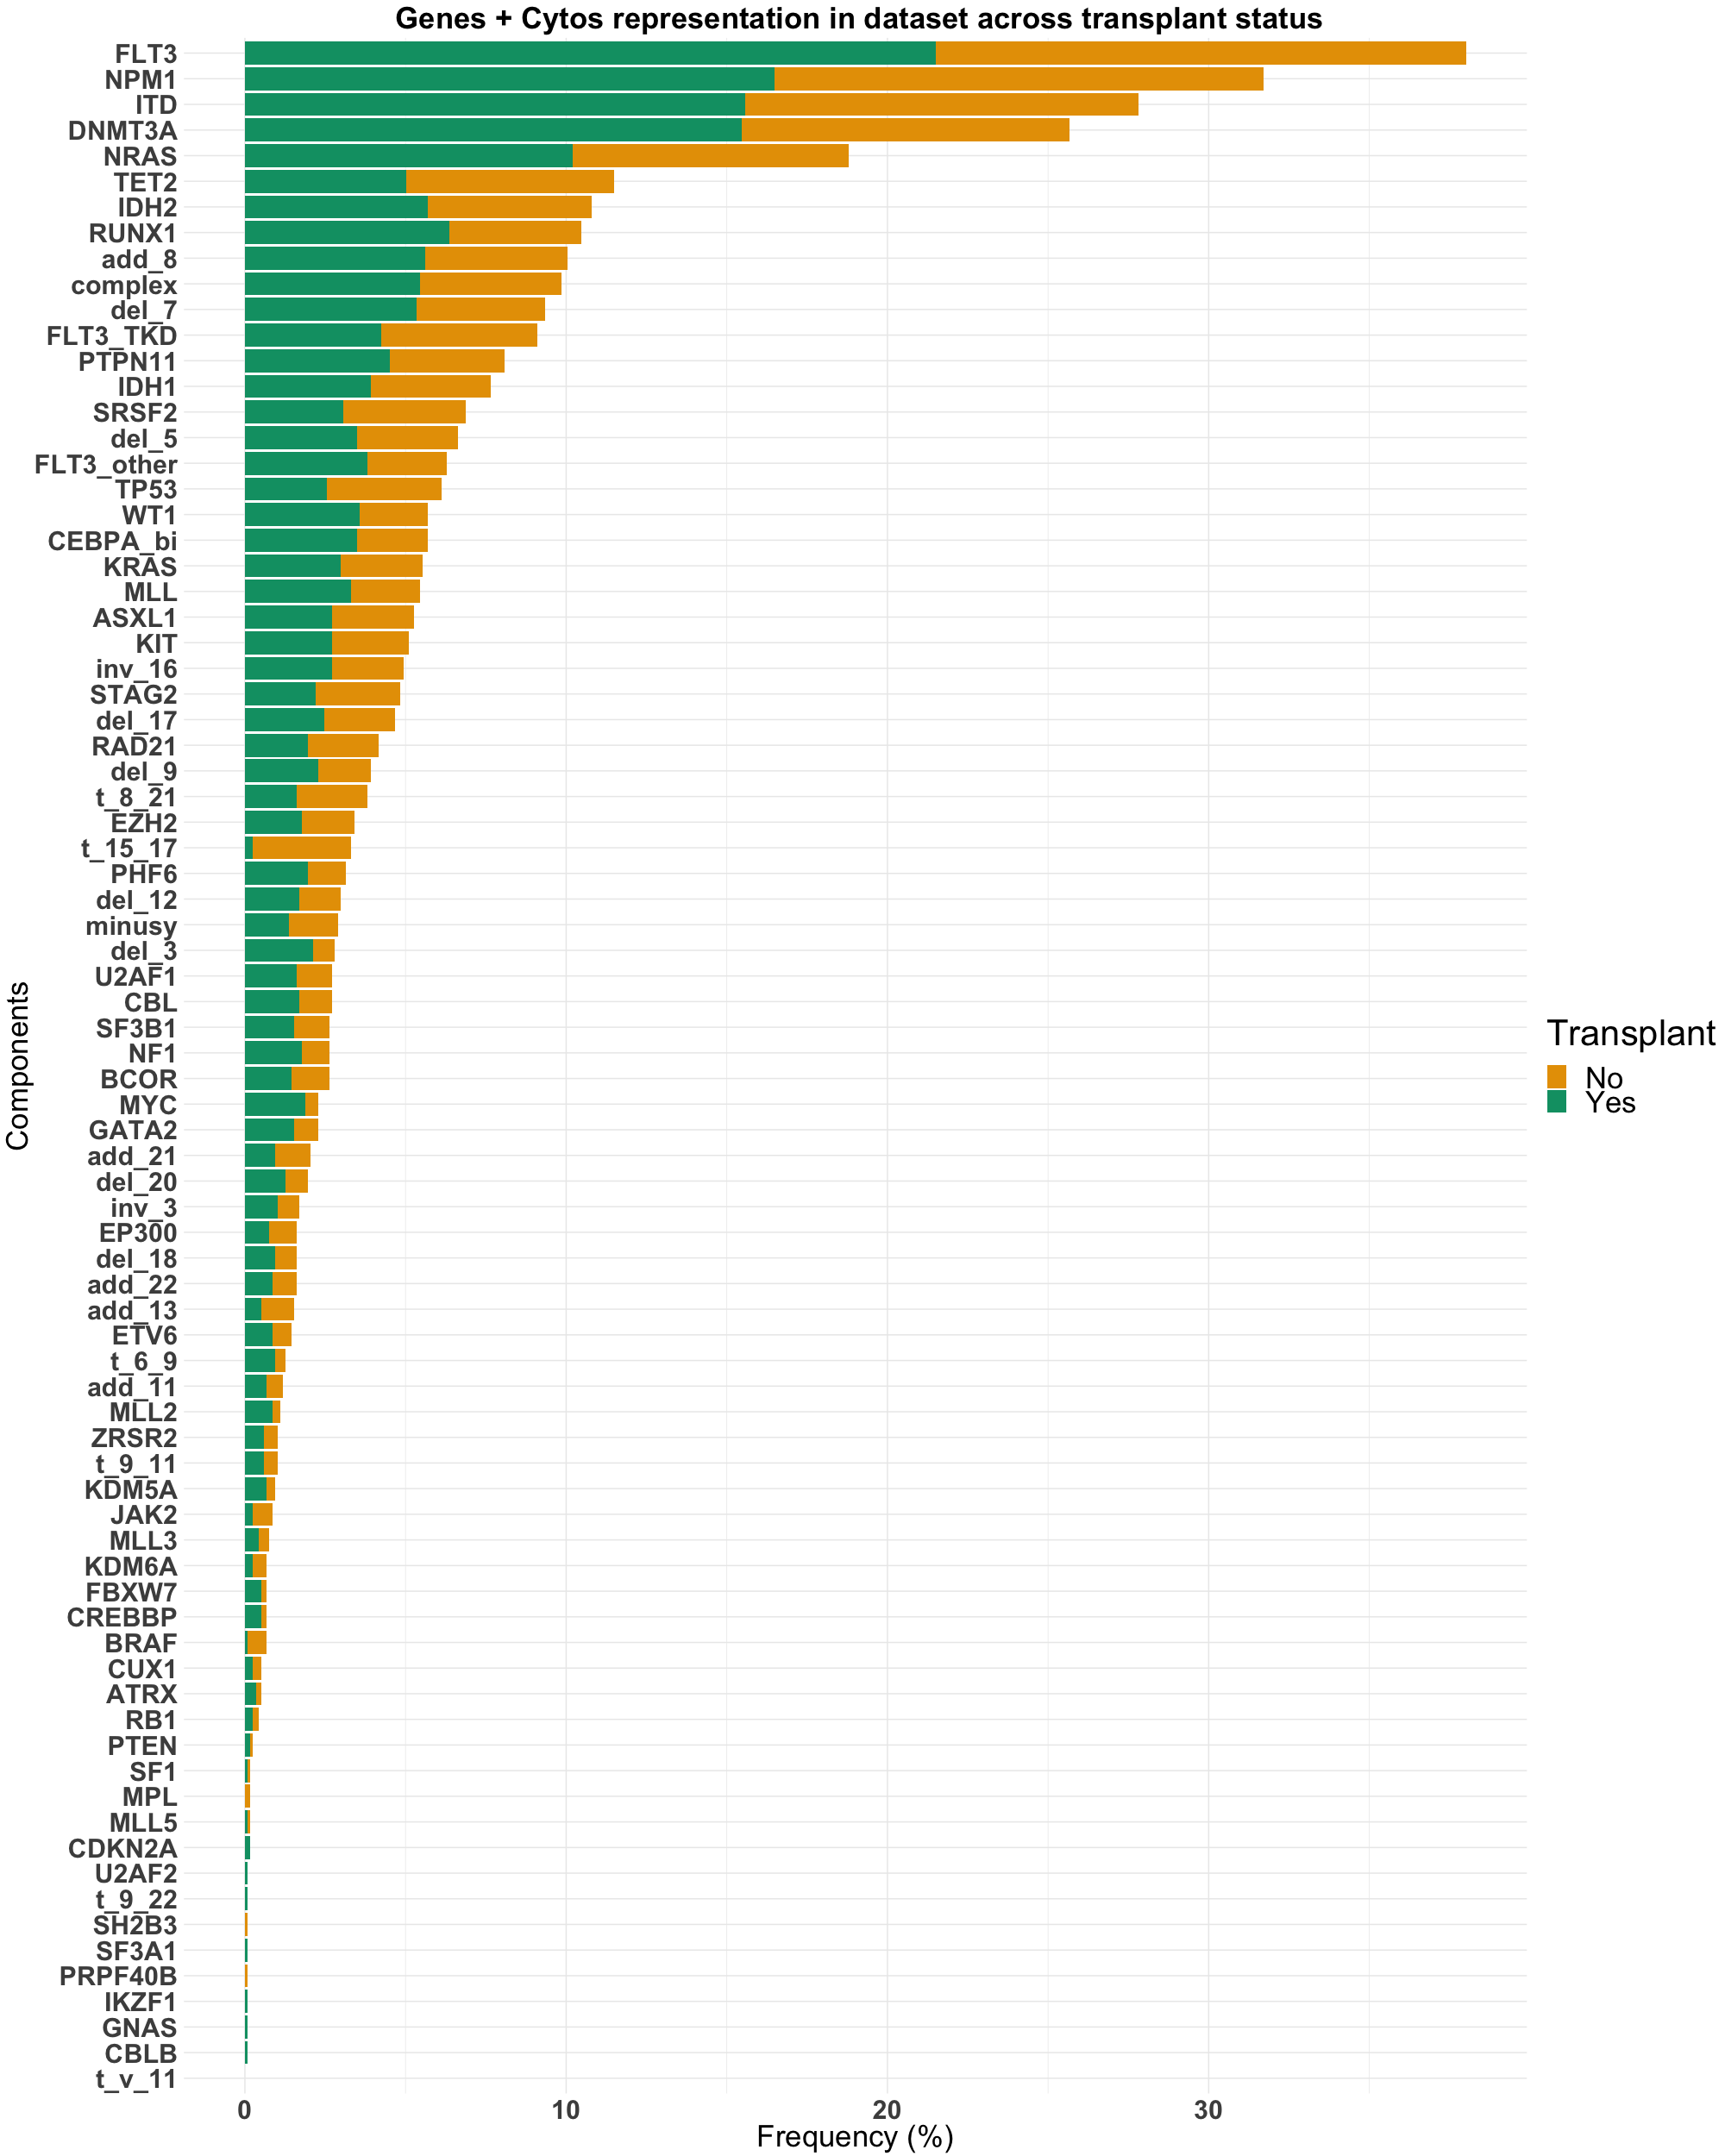

In [78]:
df_tmp <- nejm_data_tpl[,c(gen,cyto,"TPL_o")]

df_tmp_no_tpl <- df_tmp[df_tmp$TPL_o==0,]
no_tpl <- data.frame(freq = 100*colSums(df_tmp_no_tpl[,c(gen,cyto)])/nrow(nejm_data_tpl),Transplant="No")
no_tpl$names <- rownames(no_tpl)

df_tmp_tpl <- df_tmp[df_tmp$TPL_o==1,]
tpl <- data.frame(freq = 100*colSums(df_tmp_tpl[,c(gen,cyto)])/nrow(nejm_data_tpl),Transplant="Yes")
tpl$names <- rownames(tpl)

r <- rbind(no_tpl,tpl)
# r
r$names <- str_replace(r$names,"full_component_","")

p <- ggplot(r,aes(reorder(names,freq),freq,fill=Transplant))+
        geom_bar(stat="identity",aes(fill=Transplant))+
        coord_flip()+
        xlab("Molecular features") + ylab("Frequency over the cohort (%)")+scale_fill_manual(values=c("#e79f00", "#009E73"))+
scale_y_continuous(breaks = function(x) unique(floor(pretty(seq(0, (max(x) + 1) * 1.1)))))+
labs(fill='Transplant') +ggtitle(" Genes + Cytos representation in dataset across transplant status")+
theme(axis.text.x=element_text(size=22,face="bold"),axis.title.x = element_text(size=25),axis.text.y=element_text(size=22,face="bold"),axis.title.y = element_text(size=25),legend.text = element_text(size=25),legend.title = element_text(size=30),
      plot.title = element_text(size=25,face="bold",hjust=0.5))+
                   ylab("Frequency (%)")+xlab("Components")
set_notebook_plot_size(20,25)
                   p          

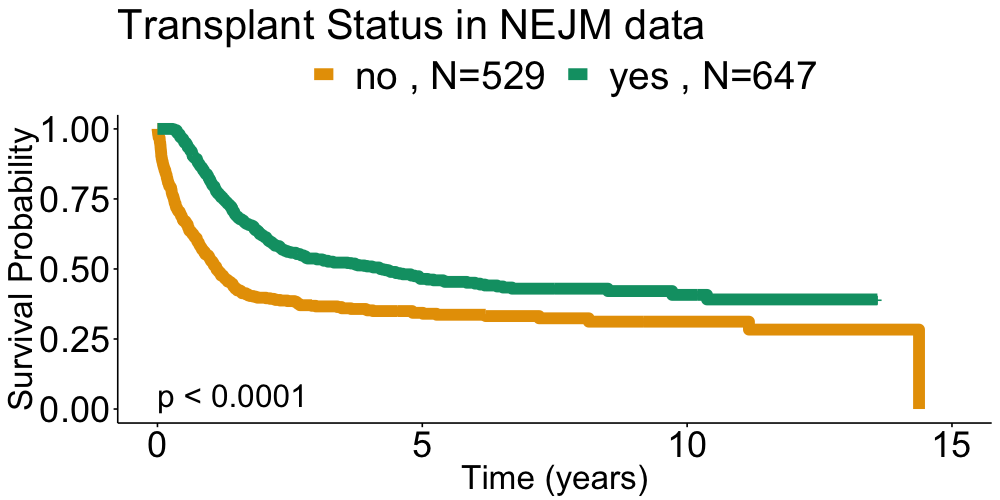

In [85]:
tmp <- nejm_data_tpl

tmp$comparison <- ifelse(tmp$TPL_o==1,"yes","no")
                               


surv_object <- Surv(time = tmp$OS, event = tmp$OS_Status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- plot_surv_curves(fit,submain = "Transplant Status in NEJM data",y="Survival Probability",val=c("#e79f00", "#009E73"))
set_notebook_plot_size(10,5)
p

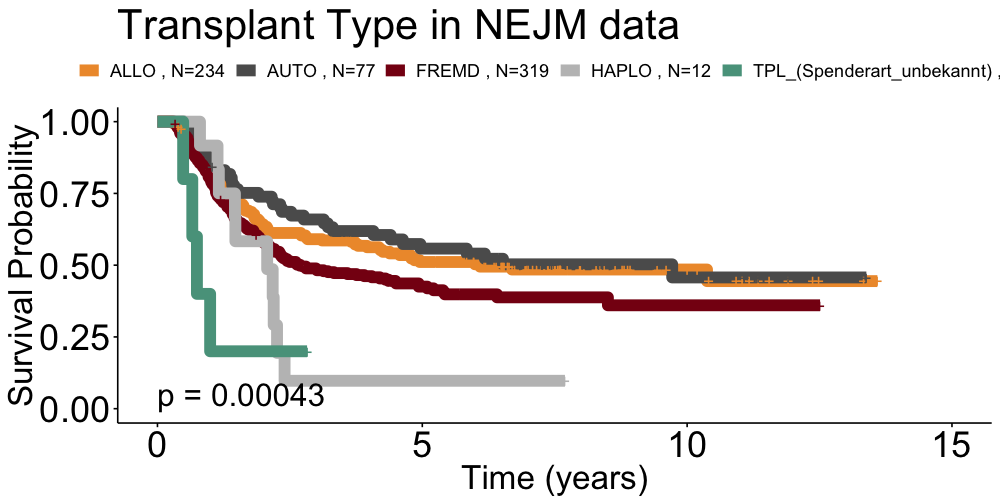

In [94]:
tmp <- nejm_data_tpl

tmp$comparison <- tmp$TPL_type
                               


surv_object <- Surv(time = tmp$OS, event = tmp$OS_Status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- plot_surv_curves(fit,submain = "Transplant Type in NEJM data",y="Survival Probability",font.legend = 13)
set_notebook_plot_size(10,5)
p

In [140]:
p <- list()
# for (co in comp) {
for (co in c("full_component_inv_16","full_component_CEBPA_bi","full_component_WT1")){
    tmp <- nejm_data_tpl[nejm_data_tpl[,co]==1,]
    tmp$comparison <- ifelse(tmp$TPL_o==1,"yes","no")
                               


    surv_object <- Surv(time = tmp$OS, event = tmp$OS_Status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    p[[co]] <- plot_surv_curves(fit,submain = str_remove(co,"full_component_"),y=ifelse(co=="full_component_inv_16","Survival Probability","")
                                ,val=c("#e79f00", "#009E73"),break.time.by=3)$plot
    set_notebook_plot_size(10,5)

}

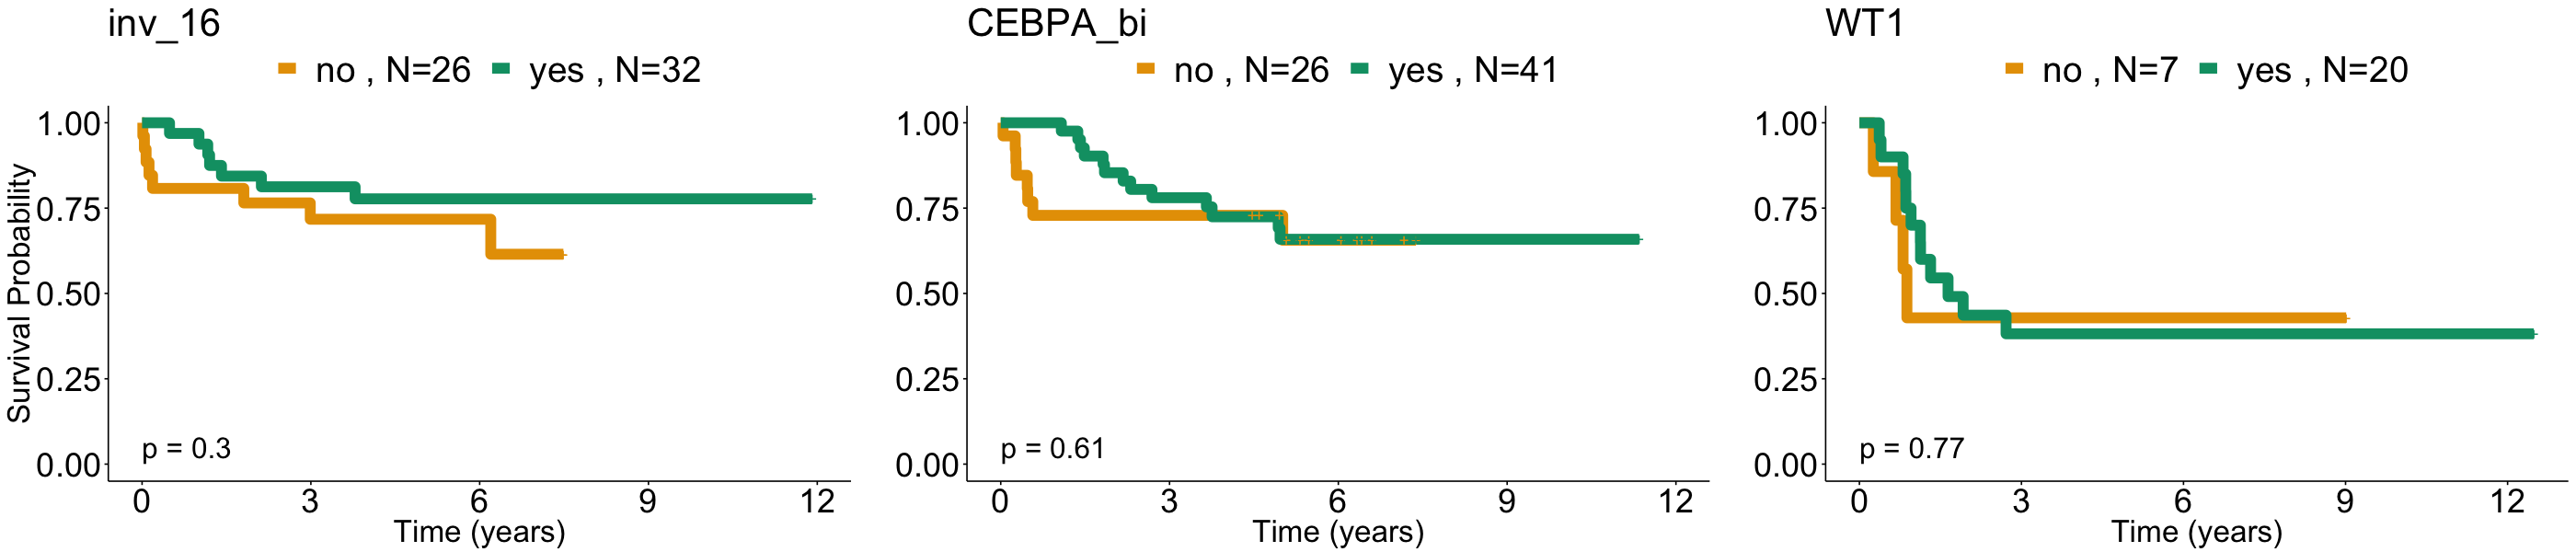

In [141]:
set_notebook_plot_size(28,6)
do.call("grid.arrange",c(p,nrow=1))

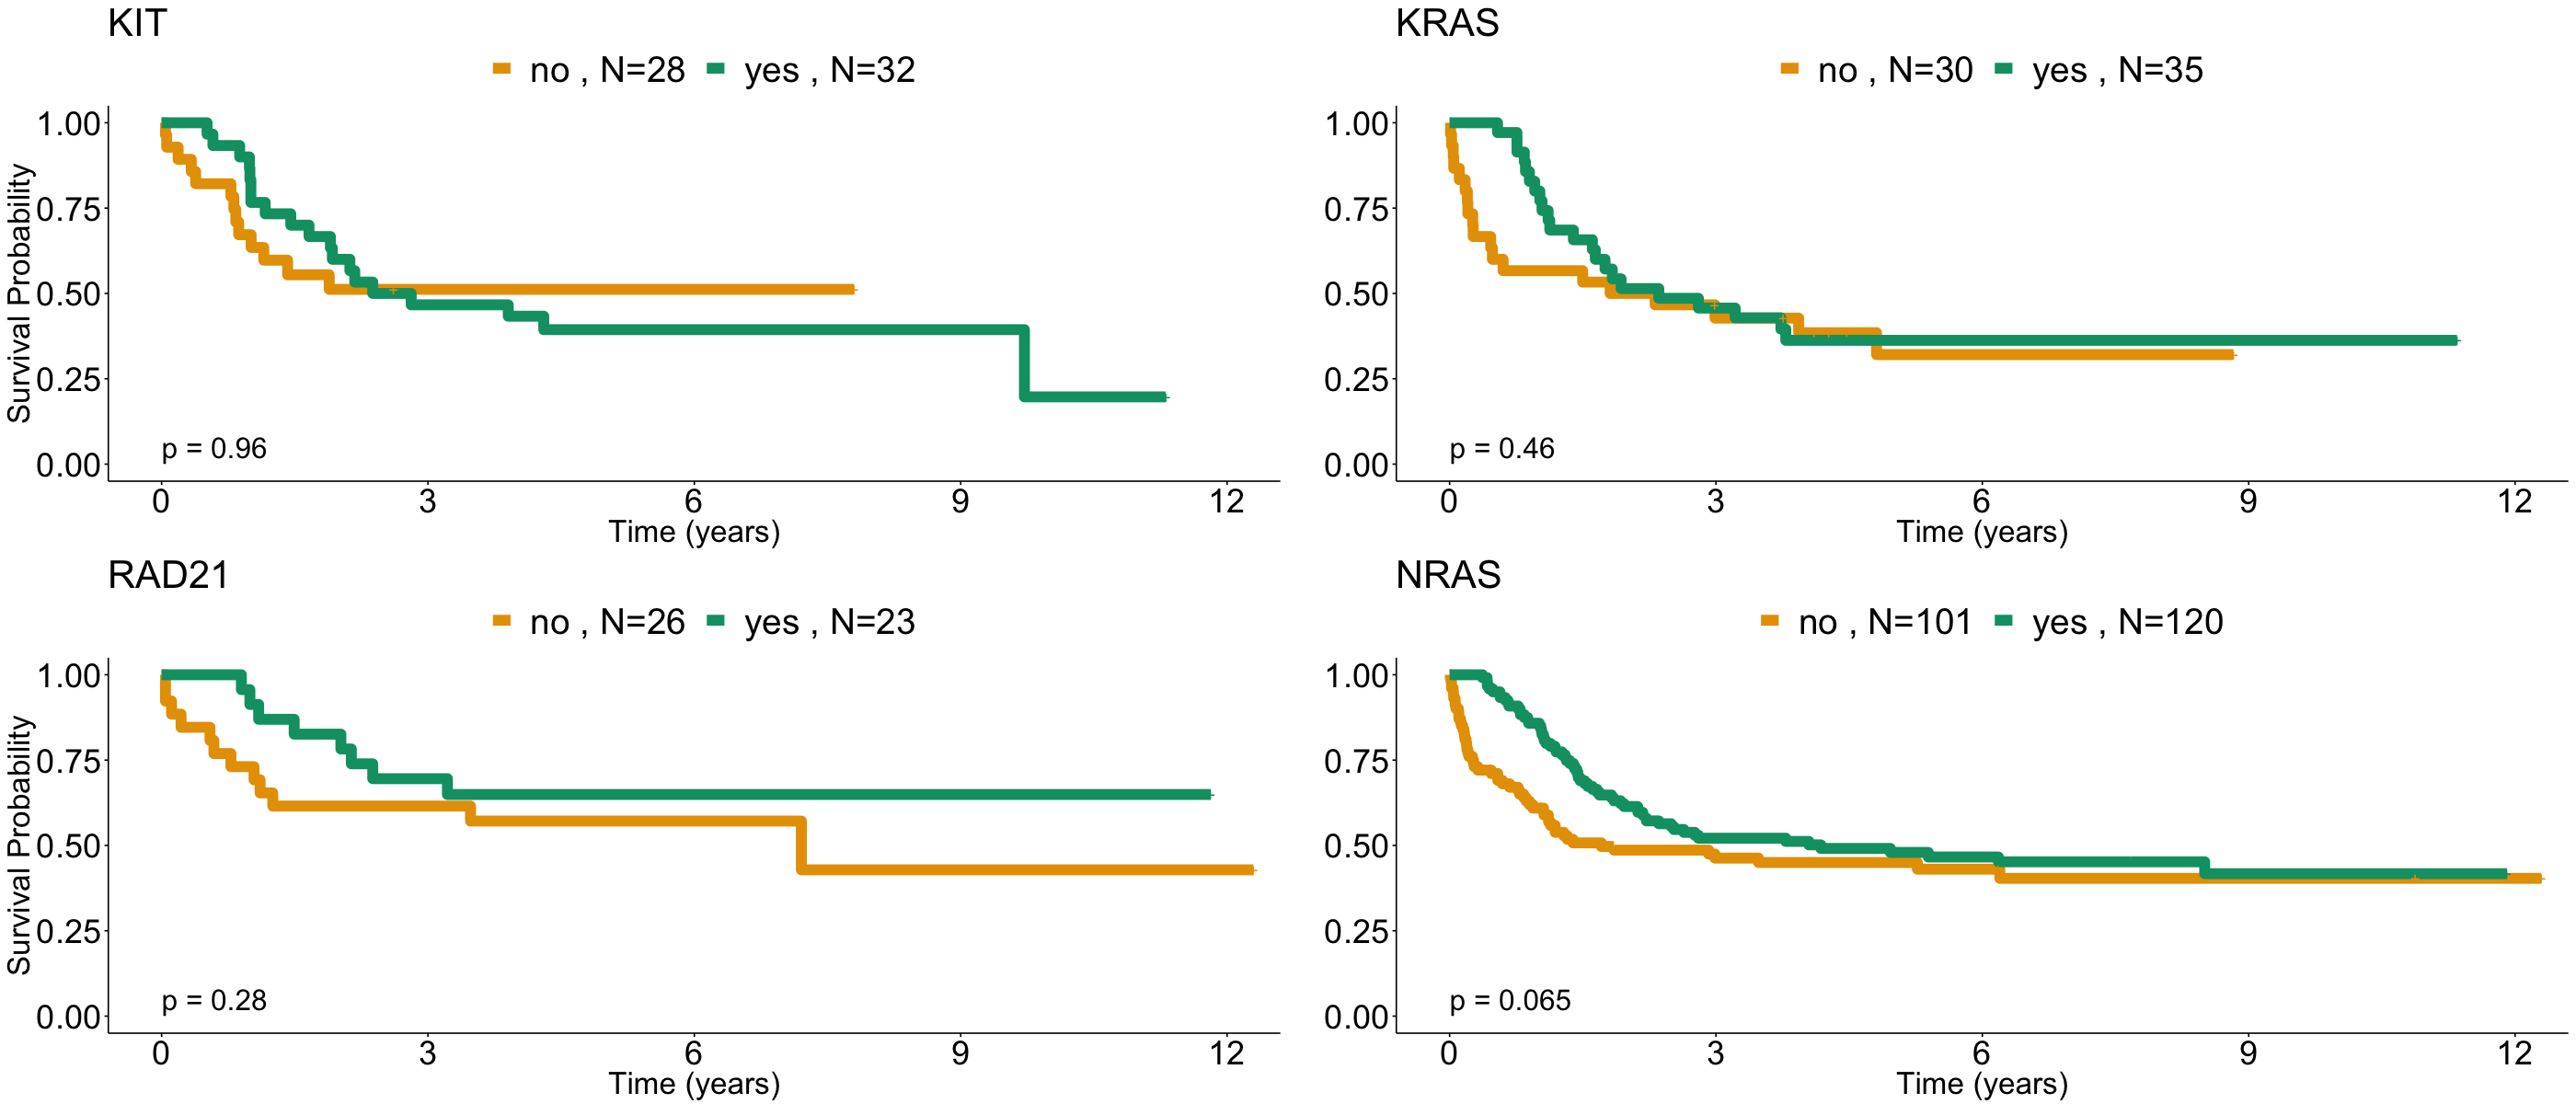

In [149]:
set_notebook_plot_size(10,5)
p <- list()
i <- 1
# for (co in c(gen,cyto)) {
for (co in c("KIT","KRAS","RAD21","NRAS")) {
    if(nrow(nejm_data_tpl[nejm_data_tpl[,co]==1,])>40){
        tmp <- nejm_data_tpl[nejm_data_tpl[,co]==1,]
        tmp$comparison <- ifelse(tmp$TPL_o==1,"yes","no")



        surv_object <- Surv(time = tmp$OS, event = tmp$OS_Status)
        fit <- survfit(surv_object ~ comparison, data = tmp)
        p[[co]] <- plot_surv_curves(fit,submain = co,y=ifelse(i%%2==1,"Survival Probability",""),val=c("#e79f00", "#009E73"))$plot
        i <- i+1
    }

}
set_notebook_plot_size(28,12)
do.call("grid.arrange",c(p,nrow=2))

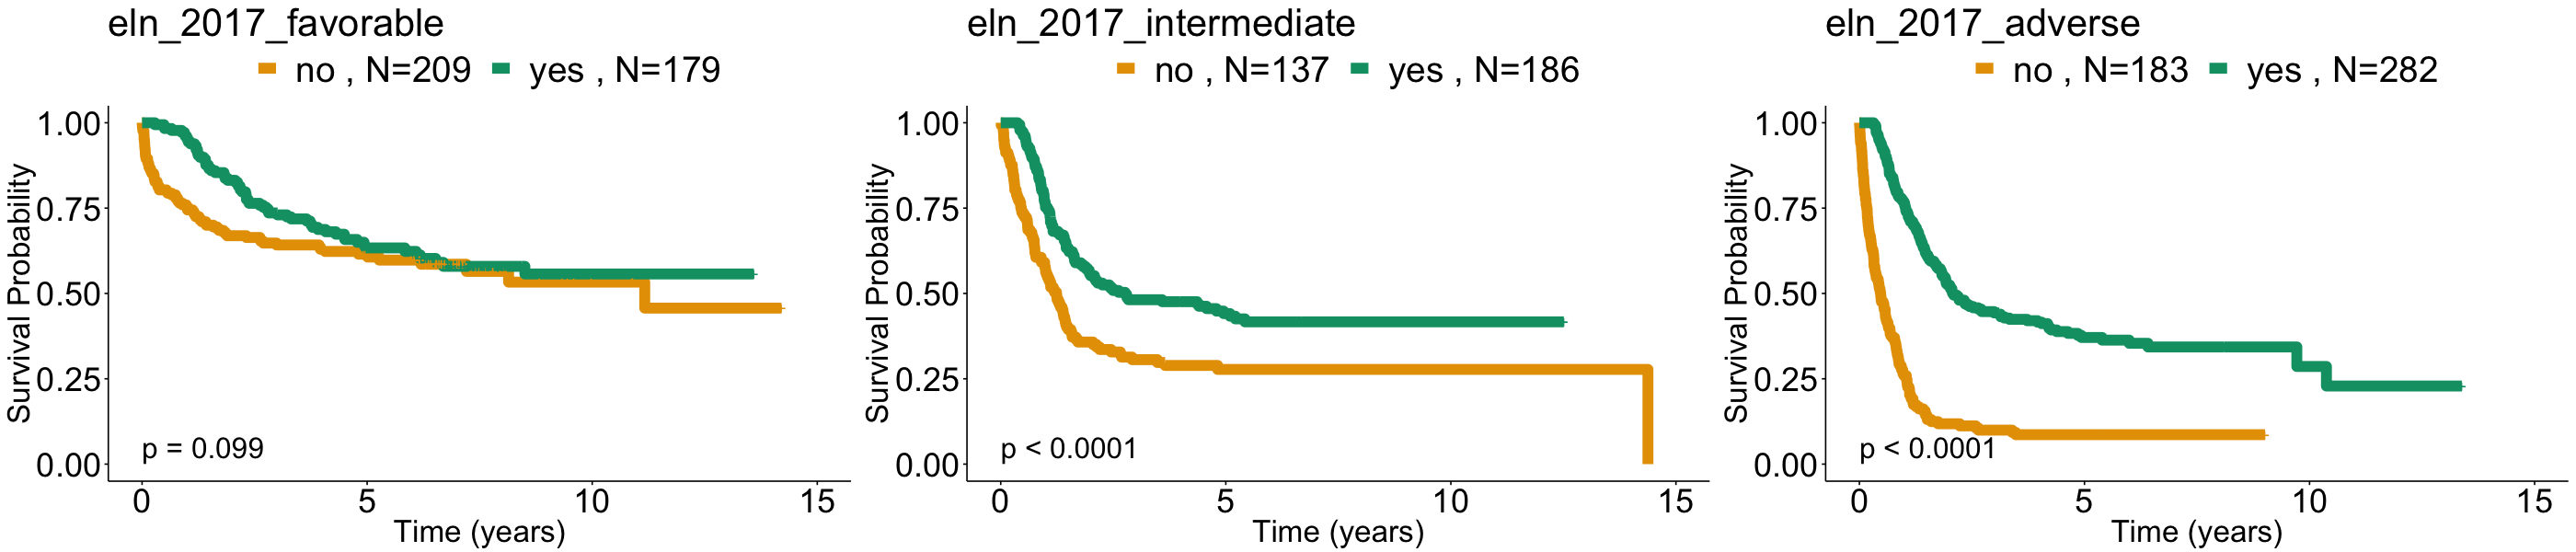

In [157]:

p <- list()
for (co in c("eln_2017_favorable","eln_2017_intermediate","eln_2017_adverse")) {
    if(nrow(nejm_data_tpl[nejm_data_tpl[,co]==1,])>40){
        tmp <- nejm_data_tpl[nejm_data_tpl[,co]==1,]
        tmp$comparison <- ifelse(tmp$TPL_o==1,"yes","no")

        surv_object <- Surv(time = tmp$OS, event = tmp$OS_Status)
        fit <- survfit(surv_object ~ comparison, data = tmp)
        p[[co]] <- plot_surv_curves(fit,submain = co,y="Survival Probability",val=c("#e79f00", "#009E73"))$plot
    }

}
set_notebook_plot_size(28,6)
do.call("grid.arrange",c(p,nrow=1))

In [158]:
tmp <- read.table("../../../clustering/clustering_Final_1/df_final_full_component.tsv")

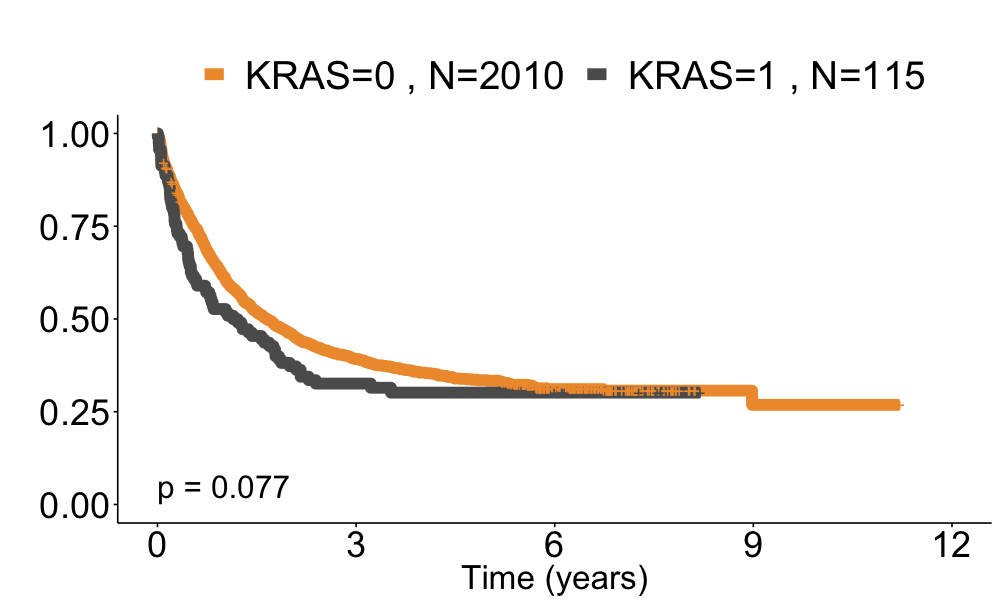

In [168]:
set_notebook_plot_size(10,6)
tmp <- read.table("../../../clustering/clustering_Final_1/df_final_full_component.tsv")


surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ KRAS, data = tmp)
plot_surv_curves(fit)

In [164]:
colnames(tmp)

[1] "eln_2017"                            
  [2] "eln_2017_adverse"                    
  [3] "eln_2017_favorable"                  
  [4] "eln_2017_intermediate"               
  [5] "ASXL1"                               
  [6] "ASXL2"                               
  [7] "ASXL3"                               
  [8] "ATRX"                                
  [9] "BAGE3"                               
 [10] "BCOR"                                
 [11] "BRAF"                                
 [12] "CBFB"                                
 [13] "CBL"                                 
 [14] "CDKN2A"                              
 [15] "CEBPA_bi"                            
 [16] "CEBPA_mono"                          
 [17] "CNTN5"                               
 [18] "CREBBP"                              
 [19] "CSF1R"                               
 [20] "CSF3R"                               
 [21] "CTCF"                                
 [22] "CUL2"                                
 [23] "CUX1"                                
 [24] "DNMT3A"                              
 [25] "EED"                                 
 [26] "ETV6"                                
 [27] "EZH2"                                
 [28] "FBXW7"                               
 [29] "ITD"                                 
 [30] "FLT3_TKD"                            
 [31] "FLT3_other"                          
 [32] "GATA1"                               
 [33] "GATA2"                               
 [34] "GNAS"                                
 [35] "GNB1"                                
 [36] "IDH1"                                
 [37] "IDH2_p.R140"                         
 [38] "IDH2_p.R172"                         
 [39] "JAK2"                                
 [40] "JAK3"                                
 [41] "KANSL1"                              
 [42] "KDM6A"                               
 [43] "KIT"                                 
 [44] "KMT2C"                               
 [45] "KMT2D"                               
 [46] "KMT2E"                               
 [47] "KRAS"                                
 [48] "LUC7L2"                              
 [49] "MED12"                               
 [50] "MLL"                                 
 [51] "MPL"                                 
 [52] "MYC"                                 
 [53] "NF1"                                 
 [54] "NFE2"                                
 [55] "NOTCH1"                              
 [56] "NPM1"                                
 [57] "NRAS_other"                          
 [58] "NRAS_p.G12_13"                       
 [59] "NRAS_p.Q61_62"                       
 [60] "PDS5B"                               
 [61] "PHF6"                                
 [62] "PPFIA2"                              
 [63] "PRPF8"                               
 [64] "PTEN"                                
 [65] "PTPN11"                              
 [66] "PTPRF"                               
 [67] "PTPRT"                               
 [68] "RAD21"                               
 [69] "RIT1"                                
 [70] "RUNX1"                               
 [71] "S100B"                               
 [72] "SETBP1"                              
 [73] "SF1"                                 
 [74] "SF3B1"                               
 [75] "SMC1A"                               
 [76] "SMC3"                                
 [77] "SMG1"                                
 [78] "SPP1"                                
 [79] "SRSF2"                               
 [80] "STAG2"                               
 [81] "STAT5B"                              
 [82] "SUZ12"                               
 [83] "TET2"                                
 [84] "TP53"                                
 [85] "U2AF1_p.S34"                         
 [86] "U2AF1_p.Q157"                        
 [87] "WT1"                                 
 [88] "ZRSR2"                               
 [89] "add_8"                             